<a href="https://colab.research.google.com/github/AayushPaigwar/CV-DL-Labs/blob/master/%5BCVDL%5D_Pract_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train ),(x_test,y_test)=datasets.cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

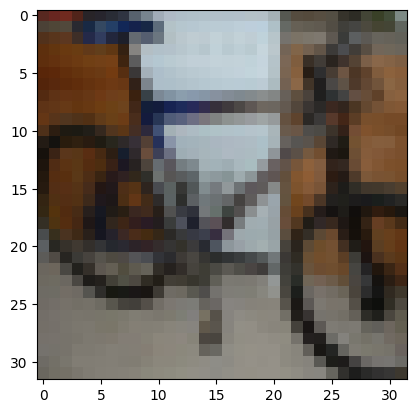

In [ ]:
plt.imshow(x_train[30])
plt.xlabel

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=100)  # Update num_classes to 100
test_labels = to_categorical(test_labels, num_classes=100)    # Update num_classes to 100

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # Update to 100 units and 'softmax' activation

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=250, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('image_classification_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 100
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('improved_image_classification_model.h5')


Epoch 1/50
782/782 [==============================] - 37s 42ms/step - loss: 4.3070 - accuracy: 0.0750 - val_loss: 3.9373 - val_accuracy: 0.1162
Epoch 2/50
782/782 [==============================] - 32s 41ms/step - loss: 3.7539 - accuracy: 0.1293 - val_loss: 3.2474 - val_accuracy: 0.2122
Epoch 3/50
782/782 [==============================] - 33s 42ms/step - loss: 3.5542 - accuracy: 0.1574 - val_loss: 3.1130 - val_accuracy: 0.2257
Epoch 4/50
782/782 [==============================] - 32s 41ms/step - loss: 3.4268 - accuracy: 0.1734 - val_loss: 3.4978 - val_accuracy: 0.1965
Epoch 5/50
782/782 [==============================] - 33s 42ms/step - loss: 3.2963 - accuracy: 0.2000 - val_loss: 3.0410 - val_accuracy: 0.2548
Epoch 6/50
782/782 [==============================] - 33s 42ms/step - loss: 3.2132 - accuracy: 0.2177 - val_loss: 2.9928 - val_accuracy: 0.2563
Epoch 7/50
782/782 [==============================] - 32s 41ms/step - loss: 3.1201 - accuracy: 0.2314 - val_loss: 2.8019 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
